In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [88]:
aspirantes_mcd = pd.read_excel('aspirantes-mcd_tidy.xlsx')
aspirantes_mcd

,Sexo,Edad,Nacionalidad,Estado Civil,Experiencia,Licenciatura: Institución,Licenciatura: Programa,Licenciatura: Promedio,Licenciatura: Tipo Titulación,Aceptado,Año
0,MUJER,33,True,CASADO(A),8,UNIVERSIDAD ESTATAL DE SONORA,LIC. EN ADMINISTRACION DE EMPRESAS TURÍSTICAS,97.00,EXAMEN NACIONAL DE CALIDAD (CENEVAL),True,2020
1,MUJER,33,True,CASADO(A),0,UNIVERSIDAD DE SONORA,LIC. EN FÍSICA,93.00,POR PROMEDIO,True,2020
2,HOMBRE,53,True,DIVORCIADO(A),27,INSTITUTO TECNOLÓGICO DE CHIHUAHUA,INGENIERÍA ELECTRÓNICA,91.00,POR PROMEDIO,False,2020
3,HOMBRE,38,True,CASADO(A),0,UNIVERSIDAD DE SONORA,INGENIERÍA INDUSTRIAL Y DE SISTEMAS,80.70,EXAMEN NACIONAL DE CALIDAD (CENEVAL),True,2020
4,HOMBRE,32,True,SOLTERO(A),2,UNIVERSIDAD DEL VALLE DE MÉXICO,LICENCIATURA EN ADMINISTRACIÓN DE EMPRESAS,90.30,EXAMEN NACIONAL DE CALIDAD (CENEVAL),True,2020
...,...,...,...,...,...,...,...,...,...,...,...
235,HOMBRE,23,True,SOLTERO(A),0,INSTITUTO TECNOLÓGICO DE HERMOSILLO,INGENIERÍA MECATRÓNICA,92.16,TRABAJO PROFESIONAL,False,2023
236,HOMBRE,24,True,SOLTERO(A),0,UNIVERSIDAD DE SONORA,LICENCIATURA EN FÍSICA,90.00,POR PROMEDIO,True,2023
237,HOMBRE,28,True,SOLTERO(A),5,UNISON,LICENCIATURA EN MATEMATICAS,89.70,TESIS PROFESIONAL,False,2023
238,HOMBRE,28,True,SOLTERO(A),0,UNISON,LICENCIATURA EN CIENCIAS DE LA COMPUTACIÓN,87.74,POR PROMEDIO,False,2023


In [89]:
df = aspirantes_mcd[['Nacionalidad', 'Aceptado']]

In [90]:
num_mexicanos = df[df['Nacionalidad'] == True].value_counts()
num_extranjeros = df[df['Nacionalidad'] == False].value_counts()

num_mexicanos

Nacionalidad  Aceptado
True          False       164
              True         52
Name: count, dtype: int64

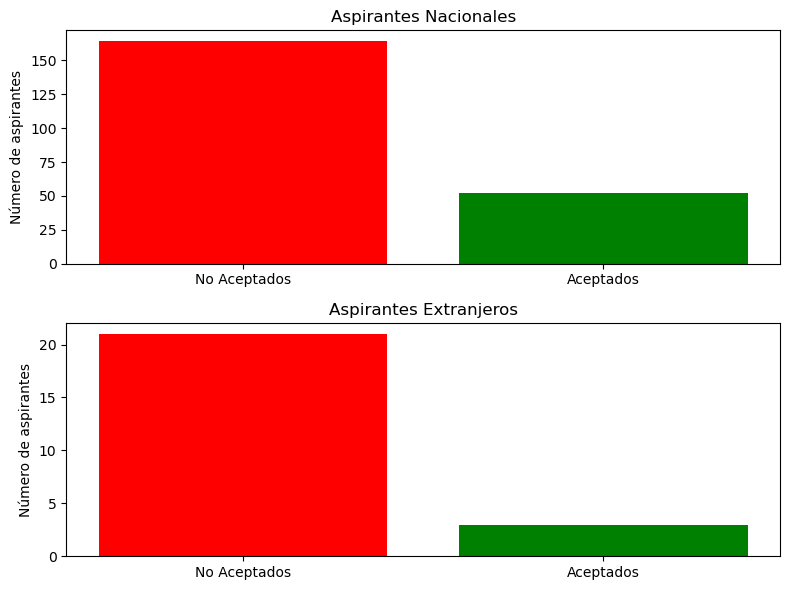

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Gráfica para nacionales
axes[0].bar(['No Aceptados', 'Aceptados'], num_mexicanos.values, color=['red', 'green'])
axes[0].set_title('Aspirantes Nacionales')
axes[0].set_ylabel('Número de aspirantes')

# Gráfica para extranjeros
axes[1].bar(['No Aceptados', 'Aceptados'], num_extranjeros.values, color=['red', 'green'])
axes[1].set_title('Aspirantes Extranjeros')
axes[1].set_ylabel('Número de aspirantes')

plt.tight_layout()
plt.savefig('..\\graficas\\aspirantes-nacionales-extranjeros')
plt.show()

In [92]:
# Gráfico de Cajas y Bigotes con: Edad de aspirantes y aceptados.
# Gráfico de Cajas y Bigotes con: Promedio de licenciatura de aspirantes y aceptados.
# Gráfico de Cajas y Bigotes con: Experiencia de aspirantes y aceptados.

In [93]:
df_boxplot = aspirantes_mcd[["Sexo", "Nacionalidad", "Edad", "Experiencia", "Licenciatura: Promedio", "Aceptado"]].reset_index(drop = True)
print(df_boxplot.shape)

(240, 6)


In [94]:
# Crear una variable para almacenar el sexo Femenino en True o False...
map_sexo = {"HOMBRE": False,
            "MUJER" : True}

df_boxplot["Sexo_Fem_True"] = df_boxplot["Sexo"]
df_boxplot["Sexo_Fem_True"] = df_boxplot["Sexo_Fem_True"].map(map_sexo)

df_boxplot.head()

,Sexo,Nacionalidad,Edad,Experiencia,Licenciatura: Promedio,Aceptado,Sexo_Fem_True
0,MUJER,True,33,8,97.0,True,True
1,MUJER,True,33,0,93.0,True,True
2,HOMBRE,True,53,27,91.0,False,False
3,HOMBRE,True,38,0,80.7,True,False
4,HOMBRE,True,32,2,90.3,True,False


In [95]:
df_boxplot_aceptados = df_boxplot.loc[df_boxplot["Aceptado"] == True]
print(df_boxplot_aceptados.shape)
df_boxplot_aceptados.head()

(55, 7)


,Sexo,Nacionalidad,Edad,Experiencia,Licenciatura: Promedio,Aceptado,Sexo_Fem_True
0,MUJER,True,33,8,97.0,True,True
1,MUJER,True,33,0,93.0,True,True
3,HOMBRE,True,38,0,80.7,True,False
4,HOMBRE,True,32,2,90.3,True,False
5,MUJER,True,26,0,97.8,True,True


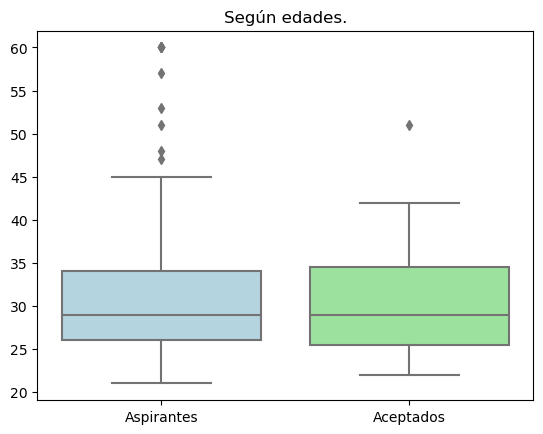

In [96]:
# Boxplot según edades...
sns.boxplot(data = [df_boxplot["Edad"], df_boxplot_aceptados["Edad"]], palette=['lightblue', 'lightgreen'])
plt.title("Según edades.")
plt.xticks([0, 1], ["Aspirantes", "Aceptados"])
plt.show()

# A partir de acá se concluye que la mayoría de los aceptados son adultos jóvenes...

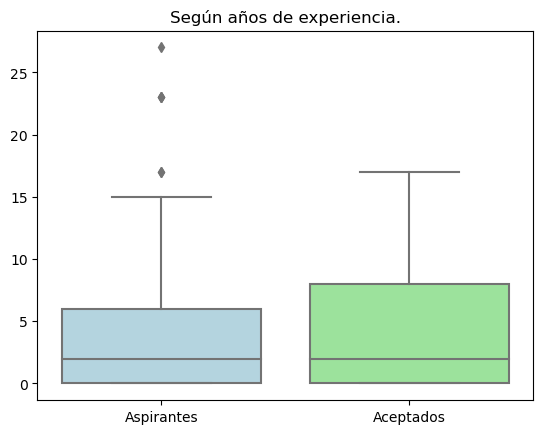

In [97]:
# Boxplot según años de experiencia...
sns.boxplot(data = [df_boxplot["Experiencia"], df_boxplot_aceptados["Experiencia"]], palette=['lightblue', 'lightgreen'])
plt.title('Según años de experiencia.')
plt.xticks([0, 1], ["Aspirantes", "Aceptados"])
plt.show()

# La mayoría de los aceptados tienen apenas 6 años de experiencia...

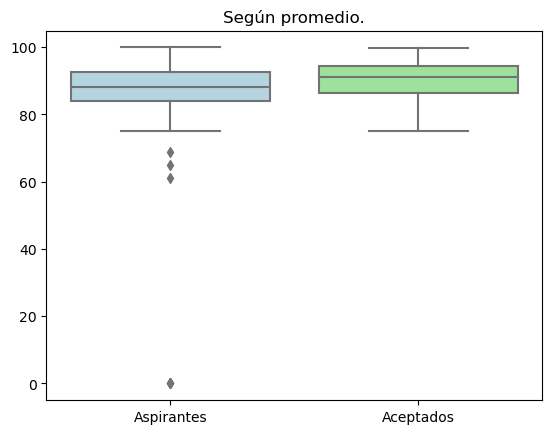

In [98]:
# Boxplot según Promedios...
sns.boxplot(data = [df_boxplot["Licenciatura: Promedio"], df_boxplot_aceptados["Licenciatura: Promedio"]], palette=['lightblue', 'lightgreen'])
plt.title('Según promedio.')
plt.xticks([0, 1], ["Aspirantes", "Aceptados"])
plt.show()

# Los aceptados tienen un promedio de más de 75 puntos, y la mayoría mayor de 80...

In [99]:
"""
Crear las bases de un KPI a partir de algunos de los valores mínimos y máximos de los aspirantes aceptados.
Valores mínimos:
- Promedio: 75.
Valores Máximos:
- Edad = 51.
- Experiencia = 17.
"""
df_boxplot_aceptados.describe()

,Edad,Experiencia,Licenciatura: Promedio
count,55.000000,55.000000,55.000000
mean,30.545455,4.181818,90.054018
std,6.312299,4.865186,5.795730
min,22.000000,0.000000,75.000000
25%,25.500000,0.000000,86.315000
50%,29.000000,2.000000,91.050000
75%,34.500000,8.000000,94.255000
max,51.000000,17.000000,99.880000


In [100]:
df_boxplot_aceptados.head(5)

,Sexo,Nacionalidad,Edad,Experiencia,Licenciatura: Promedio,Aceptado,Sexo_Fem_True
0,MUJER,True,33,8,97.0,True,True
1,MUJER,True,33,0,93.0,True,True
3,HOMBRE,True,38,0,80.7,True,False
4,HOMBRE,True,32,2,90.3,True,False
5,MUJER,True,26,0,97.8,True,True


In [101]:
df_boxplot.groupby(["Sexo", "Aceptado"]).count()
#Proporción  Aceptadas ("M"): 14 / 33 = 0.42
#            Aceptados ("H"): 41 / 152 = 0.27
# Mayor proporción de mujeres aceptadas... Diferencia: 0.15 (15%)...

Nacionalidad  Edad  Experiencia  Licenciatura: Promedio  \
Sexo   Aceptado                                                            
HOMBRE False              152   152          152                     152   
       True                41    41           41                      41   
MUJER  False               33    33           33                      33   
       True                14    14           14                      14   

                 Sexo_Fem_True  
Sexo   Aceptado                 
HOMBRE False               152  
       True                 41  
MUJER  False                33  
       True                 14

In [102]:
"""
De Forma similar con las cualitativas...

Nacionalidad:   Mexicana: Son elegidos 1 por cada 3 aspirantes... (33.3%).
                Extrangeros: 1 por cada 7 aspirantes... (14.2%).
                Diferencia: 19.1%. Pudiera probarse: (20 x Boolean)

                Sexo: Feminas tienen 15% más de aprovación...
"""
df_boxplot_aceptados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 0 to 236
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sexo                    55 non-null     object 
 1   Nacionalidad            55 non-null     bool   
 2   Edad                    55 non-null     int64  
 3   Experiencia             55 non-null     int64  
 4   Licenciatura: Promedio  55 non-null     float64
 5   Aceptado                55 non-null     bool   
 6   Sexo_Fem_True           55 non-null     bool   
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 2.3+ KB


In [103]:
# Cálculo del KPI: Según Fórmula...
# Índice de Aprobación de los aspirantes (IA-A):
# IA-A = (51 - Edad) + (17 - Experiencia) + (Promedio_Licenciatura - 75) + (Nacionalidad_Bool * 20) + (Sexo_Fem_True * 15)

df_boxplot["IA-A"] = (51 - df_boxplot["Edad"]) + (17 - df_boxplot["Experiencia"]) + (df_boxplot["Licenciatura: Promedio"] - 75) + (df_boxplot["Nacionalidad"] * 20)\
    + (df_boxplot["Sexo_Fem_True"] * 15)

In [104]:
df_IA_A = df_boxplot[["Aceptado", "IA-A"]].groupby("Aceptado").mean()

In [105]:
df_IA_A

,IA-A
Aceptado,
False,64.868324
True,71.054018
